This file is  intended to perform experiments, like visualisations...

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re

# load  to mem times

In [2]:
memlooadfiles = glob.glob("./data/latency/latency_memload*")
uninloadfiles =  glob.glob("./data/latency/latency_unin*")

timingLoadPerMB ={
}

for filesName in memlooadfiles:
    pdframe = pd.read_csv(filesName,header=None,names=["times"])
    timingsarray  =  np.array(pdframe["times"])
    lowerb, upperbound =  np.percentile(timingsarray,[5,95])
    perclist = [x for x in timingsarray if lowerb < x <  upperbound]
    memory = int(re.sub("[^0-9]", "", filesName))
    timingLoadPerMB[memory] = np.array(perclist)


timingUninPerMB ={
}

for filesName in uninloadfiles:
    pdframe = pd.read_csv(filesName,header=None,names=["times"])
    timingsarray  =  np.array(pdframe["times"])
    lowerb, upperbound =  np.percentile(timingsarray,[5,95])
    perclist = [x for x in timingsarray if lowerb < x <  upperbound]
    memory = int(re.sub("[^0-9]", "", filesName))
    timingUninPerMB[memory] = np.array(perclist)



In [23]:
print("loads")
for  key,item in timingLoadPerMB.items():
    print(key,len(item))
print("unin")
for  key,item in timingUninPerMB.items():
    print(key,len(item))


loads
51183616 98
15204352 120
10223616 96
26214400 109
91226112 81
2228224 97
1245184 142
5242880 106
unin
51183616 162
15204352 191
2228224 165
10223616 161
5242880 176
26214400 180
1245184 241
91226112 150


In [6]:
xvalues =  [ 1,  2,  5, 10, 15, 25, 50, 90]

array([ 1,  2,  5, 10, 15, 26, 51, 91])

{'min': [3.233924, 4.183275999999999, 12.593359999999999, 19.816653, 29.082285, 59.339596, 94.094163, 149.63966100000002], 'mean': [9.300268352112676, 12.172816536082475, 32.301629594339616, 46.908506010416666, 61.570698291666666, 97.54343120183484, 135.28031047959186, 195.01451072839504], 'max': [14.810258999999999, 22.637217, 48.603359, 77.89968, 107.959468, 180.246875, 274.833027, 352.939343]}


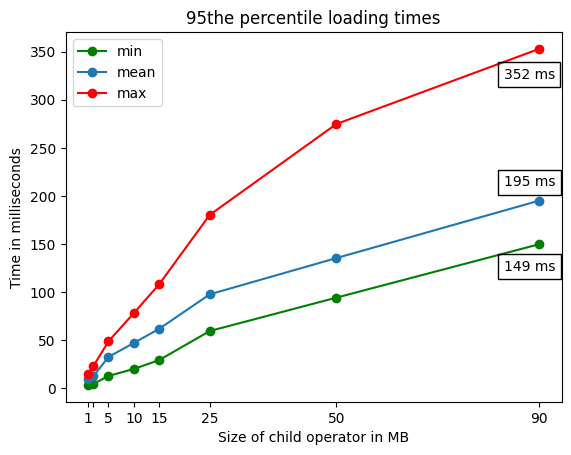

In [29]:
xvalues = []
yvalues  ={
    "min":[],
    "mean":[],
    "max":[]
}
for  key,item in sorted(timingLoadPerMB.items()):
    xvalues.append(key)
    yvalues["max"].append(np.max(item)*1000)
    yvalues["mean"].append(np.mean(item)*1000)
    yvalues["min"].append(np.min(item)*1000)

fig, ax = plt.subplots()
xvalues  =  [ 1,  2,  5, 10, 15, 25, 50, 90]
plt.title("95the percentile loading times")
plt.ylabel("Time in milliseconds")
plt.xlabel("Size of child operator in MB")
#xi = list(range(len(xvalues)))
plt.xticks(xvalues, [ "1",  "",  "5", "10", "15", "25", "50", "90"])
xi = xvalues
plt.plot(xi,yvalues["min"],label = "min", marker ='o', color = "green")
plt.plot(xi,yvalues["mean"],label = "mean", marker ='o')
plt.plot(xi,yvalues["max"],label = "max", marker ='o',color = "red")

ax.text(83, 322, str(int(yvalues["max"][-1]))+" ms", color='black', 
        bbox=dict(facecolor='none', edgecolor='black', pad=4.0))

ax.text(83, 210, str(int(yvalues["mean"][-1]))+" ms", color='black', 
        bbox=dict(facecolor='none', edgecolor='black', pad=4.0))

ax.text(83, 122, str(int(yvalues["min"][-1]))+" ms", color='black', 
        bbox=dict(facecolor='none', edgecolor='black', pad=4.0))

print(yvalues)

plt.legend()
plt.show()


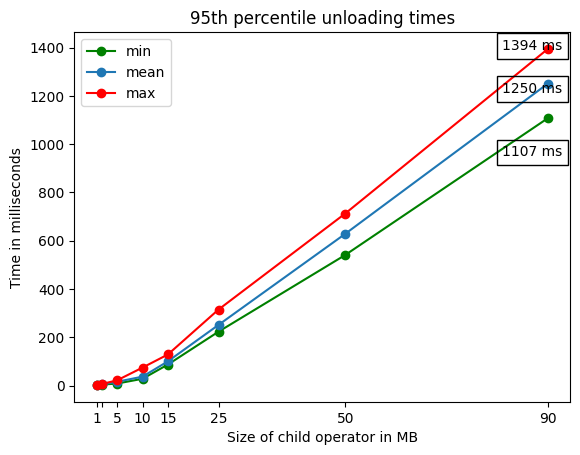

{'min': [3.2773, 4.587846, 9.093956, 28.708834, 87.731605, 223.79170200000002, 541.087858, 1107.601157], 'mean': [3.9285631452282153, 5.460813012121212, 16.460153, 37.50232511180125, 100.94715826178012, 251.85961099999997, 628.6685665864197, 1250.8370690466666], 'max': [4.860528, 7.062779, 22.588789000000002, 75.083961, 129.256374, 315.440973, 712.7510980000001, 1394.317113]}


In [30]:
xvalues = []
yvalues  ={
    "min":[],
    "mean":[],
    "max":[]
}
for  key,item in sorted(timingUninPerMB.items()):
    xvalues.append(key)
    yvalues["max"].append(np.max(item)*1000)
    yvalues["mean"].append(np.mean(item)*1000)
    yvalues["min"].append(np.min(item)*1000)


fig, ax = plt.subplots()
xvalues  =  [ 1,  2,  5, 10, 15, 25, 50, 90]
plt.xticks(xvalues, [ "1",  "",  "5", "10", "15", "25", "50", "90"])
xi = xvalues
plt.title("95th percentile unloading times")
plt.ylabel("Time in milliseconds")
plt.xlabel("Size of child operator in MB")
plt.plot(xi,yvalues["min"],label = "min", marker ='o', color = "green")
plt.plot(xi,yvalues["mean"],label = "mean", marker ='o')
plt.plot(xi,yvalues["max"],label = "max", marker ='o',color = "red")


ax.text(81, 1390, str(int(yvalues["max"][-1]))+" ms", color='black', 
        bbox=dict(facecolor='none', edgecolor='black', pad=4.0))

ax.text(81, 1212, str(int(yvalues["mean"][-1]))+" ms", color='black', 
        bbox=dict(facecolor='none', edgecolor='black', pad=4.0))

ax.text(81, 950, str(int(yvalues["min"][-1]))+" ms", color='black', 
        bbox=dict(facecolor='none', edgecolor='black', pad=4.0))




plt.legend()
plt.show()
print(yvalues)


# typical memory

In [9]:
df = pd.read_csv("data/typical.csv",delimiter=";")
print(df)
df = df.iloc[65:]

                           time        uss        pss
0    2023-05-09 10:02:16,765822   22499328   22499328
1    2023-05-09 10:02:16,972161   22499328   22499328
2    2023-05-09 10:02:17,184481   22499328   22499328
3    2023-05-09 10:02:17,394923  115195904  115195904
4    2023-05-09 10:02:17,604933  115195904  115195904
..                          ...        ...        ...
132  2023-05-09 10:02:46,204214   22515712   22515712
133  2023-05-09 10:02:46,428615   22515712   22515712
134  2023-05-09 10:02:46,653562   22515712   22515712
135  2023-05-09 10:02:46,881236   22515712   22515712
136  2023-05-09 10:02:47,106305   22515712   22515712

[137 rows x 3 columns]


/tmp/ipykernel_21847/4254096826.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


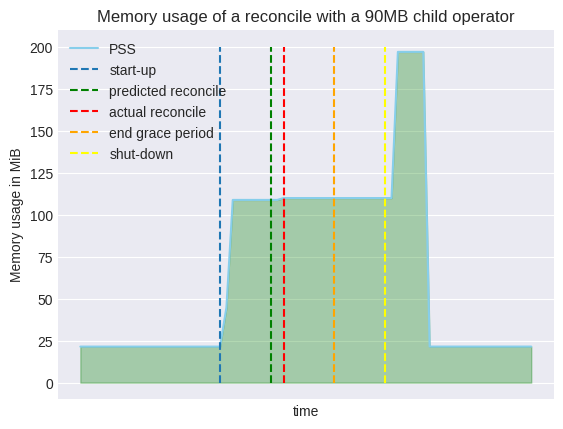

In [11]:
# create data
x=range(len(df))
y=df['pss']/1_048_576

# Change the style of plot
plt.style.use('seaborn-darkgrid')
 
# Make the same graph
plt.fill_between( x, y, color="green", alpha=0.3)
plt.plot(x, y, color="skyblue",label="PSS")
 
# Add titles

plt.vlines(x=22, ymin=0, ymax=200,linestyles='dashed',label="start-up")
plt.vlines(x=30, ymin=0, ymax=200,colors='green',linestyles='dashed',label="predicted reconcile")
plt.vlines(x=32, ymin=0, ymax=200,colors='red',linestyles='dashed',label="actual reconcile")
plt.vlines(x=40, ymin=0, ymax=200,colors='orange',linestyles='dashed',label="end grace period")
plt.vlines(x=48, ymin=0, ymax=200,colors='yellow',linestyles='dashed',label="shut-down")


plt.title("Memory usage of a reconcile with a 90MB child operator")
plt.ylabel("Memory usage in MiB")
plt.xlabel("time")
plt.legend()
plt.xticks([])
# Show the graph
plt.show()

# memory usage total

In [3]:
df = pd.read_csv("data/latency_e2e/delay30.csv",delimiter=";",parse_dates=[0])
print(df)


                            time        uss        pss
0     2023-05-12 14:33:53.352508   23621632   23621632
1     2023-05-12 14:33:53.554801   23621632   23621632
2     2023-05-12 14:33:53.757251   23621632   23621632
3     2023-05-12 14:33:53.962256   23621632   23621632
4     2023-05-12 14:33:54.165740   23621632   23621632
...                          ...        ...        ...
23632 2023-05-12 16:07:23.373994   25088000   25088000
23633 2023-05-12 16:07:23.613707   25088000   25088000
23634 2023-05-12 16:07:23.847662   25088000   25088000
23635 2023-05-12 16:07:24.085478   85180416   85180416
23636 2023-05-12 16:07:24.320593  116637696  116637696

[23637 rows x 3 columns]


In [ ]:
df5 = pd.read_csv("data/latency_e2e/delay5.csv",delimiter=";",parse_dates=[0])
df10 = pd.read_csv("data/latency_e2e/delay10.csv",delimiter=";",parse_dates=[0])
df20 = pd.read_csv("data/latency_e2e/delay20.csv",delimiter=";",parse_dates=[0])
df30 = pd.read_csv("data/latency_e2e/delay30.csv",delimiter=";",parse_dates=[0])
df60 = pd.read_csv("data/latency_e2e/delay60.csv",delimiter=";",parse_dates=[0])

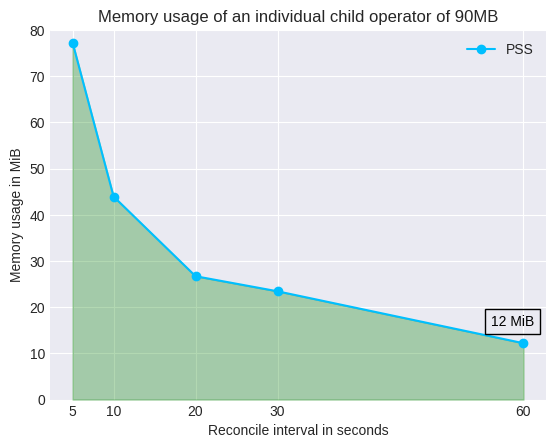

In [69]:
# create data



x=[5,10,20,30,60]
y=[(np.mean(df5['pss']) - np.min(df5['pss']))  /1_048_576,
   (np.mean(df10['pss']) - np.min(df5['pss']))  /1_048_576,
   (np.mean(df20['pss']) - np.min(df5['pss']))  /1_048_576,
   (np.mean(df30['pss']) - np.min(df5['pss']))  /1_048_576,
   (np.mean(df60['pss']) - np.min(df5['pss']))  /1_048_576
   
   ]

# Change the style of plot
#plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots()
# Make the same graph
#plt.fill_between( x, y, color="green", alpha=0.1)
plt.plot(x, y, label="PSS",color="deepskyblue",marker ='o')
 
# Add titles

ax.text(56, 16, str(int(y[-1]))+" MiB", color='black', 
        bbox=dict(facecolor='none', edgecolor='black', pad=4.0))

 
# Make the same graph
plt.fill_between( x, y, color="green", alpha=0.3)

plt.title("Memory usage of an individual child operator of 90MB")
plt.ylabel("Memory usage in MiB")
plt.xlabel("Reconcile interval in seconds")
plt.legend()
plt.xticks(x,x)
plt.ylim((0,80))
# Show the graph
plt.show()

In [ ]:
x=[5,10,20,30,60]
y=[(np.mean(df5['pss']) - np.min(df5['pss']))  /1_048_576,
   (np.mean(df10['pss']) - np.min(df5['pss']))  /1_048_576,
   (np.mean(df20['pss']) - np.min(df5['pss']))  /1_048_576,
   (np.mean(df30['pss']) - np.min(df5['pss']))  /1_048_576,
   (np.mean(df60['pss']) - np.min(df5['pss']))  /1_048_576
   
   ]

# Change the style of plot
#plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots()
# Make the same graph
#plt.fill_between( x, y, color="green", alpha=0.1)
plt.plot(x, y, label="PSS",marker ='o')
 
# Add titles

ax.text(56, 16, str(int(y[-1]))+" MiB", color='black', 
        bbox=dict(facecolor='none', edgecolor='black', pad=4.0))


plt.title("Memory usage of an individual child operator of 90MB")
plt.ylabel("Memory usage in MiB")
plt.xlabel("Reconcile interval in seconds")
plt.legend()
plt.xticks(x,x)
plt.ylim((0,80))
# Show the graph
plt.show()

# Latency timings

In [3]:
reconciletimes = pd.read_csv("data/latency_e2e/reconciletimes5.csv",header=None,names=["time"],parse_dates=[0])

In [4]:
changetimes = pd.read_csv("data/latency_e2e/changetimes5.csv",header=None,names=["time"],parse_dates=[0])

In [5]:
differences = reconciletimes["time"] - changetimes["time"]

In [6]:
differences = [x.total_seconds() * 1000 for x in differences]

In [7]:
np.mean(differences)

58.540554455445545

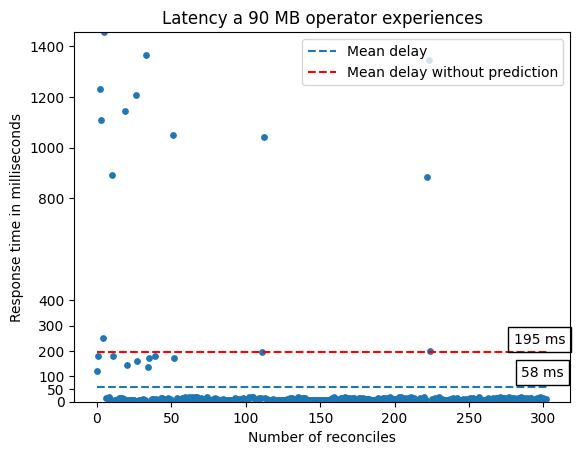

In [17]:
fig, ax = plt.subplots()
ax.text(285, 100, str(int(np.mean(differences)))+" ms", color='black', 
        bbox=dict(facecolor='none', edgecolor='black', pad=4.0))

#  nr 195 is mean of other test
ax.text(280, 230, "195"+" ms", color='black', 
        bbox=dict(facecolor='none', edgecolor='black', pad=4.0))


plt.scatter(range(len(differences)),differences,s=15)
plt.hlines(y=np.mean(differences), xmin=0, xmax=len(differences),linestyles='dashed',label="Mean delay")
plt.hlines(y=195, xmin=0, xmax=len(differences),linestyles='dashed',color="red",label="Mean delay without prediction")

plt.title("Latency a 90 MB operator experiences")
plt.ylabel("Response time in milliseconds")
plt.xlabel("Number of reconciles")
plt.legend(loc="upper right")
#plt.xlim((0,len(differences)))
plt.ylim((0,np.max(differences)))
plt.yticks([0,50,100,200,300,400,800,1000,1200,1400],[0,50,100,200,300,400,800,1000,1200,1400])
#plt.yscale('log',base=2) 
# Show the graph

plt.show()